# 1. Introduction

## 1.1. Project Overview

This project focuses on analyzing public sentiment from Tweets regarding Apple and Google products. The main goal is to build a Natural Language Processing (NLP) model that can classify the sentiment of a Tweet as positive, negative, or neutral based on its content.

The data, sourced from [CrowdFlower](https://data.world/crowdflower/brands-and-product-emotions), contains over 9,000 Tweets labeled by human raters. By analyzing this data, the model will help Apple and Google better understand customer perceptions of their products, allowing them to make informed decisions for marketing, customer service, and product development.

We will begin by preprocessing the Tweets, transforming them into a numerical format suitable for machine learning models, and training several classification algorithms to evaluate their performance.


## 1.2. Business Problem & Stakeholder

### Business Problem:
Public perception of tech products can heavily influence a company's sales, customer satisfaction, and brand loyalty. For companies like Apple and Google, understanding how customers feel about their products can provide valuable insights into areas for improvement, marketing strategies, and product development. 

In this project, we aim to develop a model that automatically classifies the sentiment of Tweets regarding Apple and Google products as positive, negative, or neutral. This can help companies quickly gauge public sentiment at scale, providing actionable insights for decision-making.

### Stakeholders:
- **Apple and Google Product Teams:** Use sentiment data to improve products and address customer pain points.
- **Marketing Departments:** Tailor campaigns to target sentiment-driven messaging.
- **Customer Support Teams:** Identify negative feedback more quickly to address concerns.
- **Executives/Decision Makers:** Gain a high-level view of public opinion, enabling better strategic planning.


## 1.3. Dataset Description

The dataset used in this project comes from [CrowdFlower](https://data.world/crowdflower/brands-and-product-emotions), containing over 9,000 Tweets. Each Tweet has been labeled by human raters with one of three sentiment categories: positive, negative, or neither. The dataset contains the following key columns:

### Key Features of the Dataset:
- **Text**: The actual content of the Tweet, which we will analyze for sentiment classification.
- **Brand/Product**: The specific product or brand mentioned in the Tweet, such as `iPhone`, `Google`, or `iPad`.
- **Emotion**: The sentiment label, representing whether the sentiment expressed in the Tweet is `Positive emotion`, `Negative emotion`, or neutral.

### Target Variable:
- **Emotion**: This will be the target variable, as it captures the sentiment associated with each Tweet.

The dataset will be used to train and evaluate models that can predict the sentiment of unseen Tweets based on their text content.


## 1.4. Objectives

### Specific Objective
- Develop a Natural Language Processing (NLP) model to accurately classify the sentiment of Tweets about Apple and Google products into three categories: positive, negative, and neutral.

### Additional Objectives

1. **Data Preprocessing**: Clean and prepare the Tweet data for analysis, which includes handling missing values, normalizing text (removing URLs, special characters, etc.), and tokenization.

2. **Exploratory Data Analysis (EDA)**: Conduct exploratory analysis to understand the distribution of sentiments in the dataset, identify any patterns, and visualize key aspects of the data.

3. **Model Development**: Implement and train various classification models (e.g., Logistic Regression, Support Vector Machines, and Naive Bayes) to classify the sentiment of Tweets.

4. **Model Evaluation**: Evaluate the performance of the models using appropriate metrics such as accuracy, precision, recall, and F1 score, especially focusing on multiclass classification metrics.

5. **Iterative Improvement**: Based on initial results, refine the models by incorporating advanced techniques such as feature engineering, hyperparameter tuning, or using pre-trained embeddings like Word2Vec or BERT.

6. **Conclusion and Recommendations**: Summarize the findings, discuss the model's effectiveness, and provide actionable recommendations for stakeholders based on the analysis.


# 2. Data Understanding & Exploration

## 2.1. Data Loading & Initial Exploration

In this step, we will:

1. Load the dataset.
2. Display the first few rows to understand the structure.
3. Check the data types of each column.
4. Identify missing values and duplicates.
5. Analyze the class distribution to check for potential imbalance.
6. Perform basic descriptive statistics (e.g., distribution of Tweet lengths and word counts).

In [3]:
# Importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
%matplotlib inline
plt.style.use('ggplot')  # for nicer visualizations
sns.set_palette("Set2")  # Set Seaborn color palette

In [4]:
# Load the dataset
raw_data = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding = "latin1")

In [5]:
# Display the first 5 rows
raw_data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


The column names seem to be unnecessarily long, we'll rename them to improve readability.

In [6]:
# Renaming the columns
raw_data.columns = ["Text", "Brand/Product", "Emotion"]
raw_data.head()

,Text,Brand/Product,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [7]:
# Checking the number of raws and columns
raw_data.shape

(9093, 3)

In [8]:
# Getting an overview of the data types
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Text           9092 non-null   object
 1   Brand/Product  3291 non-null   object
 2   Emotion        9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [9]:
# Checking for missing values
raw_data.isnull().sum()

Text                1
Brand/Product    5802
Emotion             0
dtype: int64

In [11]:
# Checking for duplicates based on the Text column
duplicates = raw_data.duplicated(subset='Text').sum()
print(f"Number of duplicate rows based on the text column: {duplicates}")

Number of duplicate rows based on the text column: 27


In [12]:
# Handle missing values in 'Text' column
raw_data['Text'] = raw_data['Text'].fillna('')  # Replace NaN with an empty string

# Descriptive statistics for tweet length and word count
raw_data['tweet_length'] = raw_data['Text'].apply(len)
raw_data['word_count'] = raw_data['Text'].apply(lambda x: len(x.split()))

print("Tweet Length Statistics:")
print(raw_data['tweet_length'].describe())

print("Word Count Statistics:")
print(raw_data['word_count'].describe())

Tweet Length Statistics:
count    9093.000000
mean      104.950731
std        27.208419
min         0.000000
25%        86.000000
50%       109.000000
75%       126.000000
max       178.000000
Name: tweet_length, dtype: float64
Word Count Statistics:
count    9093.000000
mean       17.763444
std         4.964105
min         0.000000
25%        14.000000
50%        18.000000
75%        21.000000
max        33.000000
Name: word_count, dtype: float64


- **Average tweet length** is *105 characters* with a max of *178 characters*.
- **Average word count** is around *18 words*, with a maximum of *33 words*.

## 2.2. Data Cleaning

In this section, we will:

- Handle missing values in the `Brand/Product` column.
- Remove any duplicate rows.
- Clean the text data by removing URLs, mentions, and special characters.

### Handling Missing Values

Since the `Brand/Product` column contains a large number of missing values, we can consider one of the following approaches:

- Dropping the column entirely if it's not necessary for the analysis.
- Imputing values, but this might be challenging as this is categorical text data.

For now, since this column is not critical to sentiment analysis, we'll drop it.

In [13]:
# Dropping the 'Brand/Product' column due to many missing values
data_cleaned = raw_data.drop(columns=['Brand/Product'])
data_cleaned.head()

,Text,Emotion,tweet_length,word_count
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,127,23
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,139,22
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,79,15
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,82,15
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,131,17


### Handling Duplicates

We'll remove the duplicate rows.

In [14]:
# Removing duplicate rows
data_cleaned = data_cleaned.drop_duplicates()
print(f"Number of rows after removing duplicates: {data_cleaned.shape[0]}")

Number of rows after removing duplicates: 9071


### Cleaning the Text Column

To prepare the Text Column for modeling, we'll:

- Remove URLs, mentions, and special characters.
- Convert text to lowercase for uniformity.

In [15]:
import re

# Function to clean Text Column
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#\w+", "", text)  # Remove hashtags (optional)
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    text = text.strip()  # Remove leading/trailing spaces
    return text

# Applying the cleaning function to the 'Text' column
data_cleaned['cleaned_text'] = data_cleaned['Text'].apply(clean_text)
data_cleaned[['Text', 'cleaned_text']].head()

,Text,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,i have a g iphone after hrs tweeting at it w...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know about awesome ipadiphone app that youll...
2,@swonderlin Can not wait for #iPad 2 also. The...,can not wait for also they should sale them ...
3,@sxsw I hope this year's festival isn't as cra...,i hope this years festival isnt as crashy as t...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff on fri marissa mayer google tim o...


## Cleaning the Emotion Column

In [16]:
# Checking the occurence of unique values
data_cleaned["Emotion"].value_counts()

No emotion toward brand or product    5376
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: Emotion, dtype: int64

In [17]:
data_cleaned["Emotion"] = data_cleaned["Emotion"].replace({
    "No emotion toward brand or product": "Neutral",
    "Positive emotion": "Positive",
    "Negative emotion": "Negative"
})

data_cleaned["Emotion"].value_counts()

Neutral         5376
Positive        2970
Negative         569
I can't tell     156
Name: Emotion, dtype: int64

In [18]:
# Setting display options to show the full text
pd.set_option('display.max_colwidth', None)  

# Displaying the tweets where Emotion is "I can't tell"
cant_tell_tweets = data_cleaned[data_cleaned["Emotion"] == "I can't tell"]["cleaned_text"]
print(cant_tell_tweets)

90                                                        thanks to  for publishing the news of  new medical apps at the  conf blog link
102                                  quotapple has opened a popup store in austin so the nerds in town for  can get their new ipads link
237                             just what america needs rt  google to launch major new social network called circles possibly today link
341                                                               the queue at the apple store in austin is four blocks long crazy stuff
368                                       hope its better than wave rt  buzz is googles previewing a social networking platform at  link
                                                                      ...                                                               
9020    its funny watching a room full of people hold their ipad in the air to take a photo like a room full of tablets staring you down
9032                                     

In [19]:
# Drop rows where the Emotion is "I can't tell"
data_cleaned = data_cleaned[data_cleaned["Emotion"] != "I can't tell"]

On investigating the text with the cant tell emotion we decided to drop the rows because there was no clear sentiment information, as some of the texts seemed sarcastic making them less useful for accurate analysis or modeling.

## 2.3. Sentiment Class Distribution Visualization

In this step, we will visualize the sentiment class distribution to better understand the balance between different sentiment categories in the dataset. We will use a bar chart to display the count of each sentiment label: `positive`, `negative`, and `neutral`.

The bar chart will help us assess the overall distribution and check for any significant class imbalance, which may affect our modeling process later.

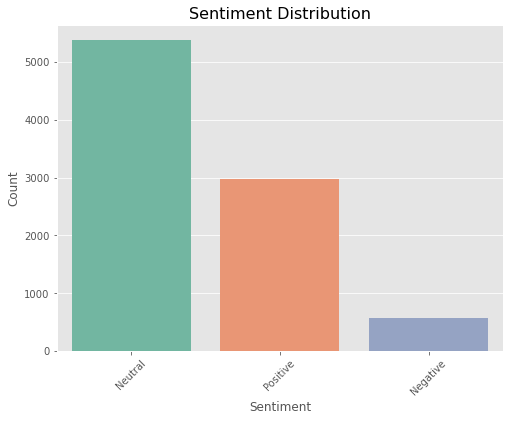

In [20]:
# Setting plot size and style
plt.figure(figsize=(8, 6))

# Plotting sentiment distribution using Seaborn's countplot
sns.countplot(x='Emotion', 
              data= data_cleaned, 
              order= data_cleaned['Emotion'].value_counts().index)

# Adding title and labels
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

The sentiment distribution graph clearly shows that the dataset is imbalanced, with the majority of tweets labeled as `Neutral`, followed by `Positive emotion,` while `Negative emotion` labels has significantly fewer instances.

This imbalance is something we'll need to address during the modeling phase, potentially through techniques like resampling or adjusting class weights.

## 2.4. Further Visualizations

We will now:

- **Distribution of Tweet Lengths:** A histogram to show how the lengths of the tweets are distributed.
- **Word Count Distribution:** A similar histogram for word count distribution.
- **Correlation Between Tweet Length and Sentiment:** Boxplots to visualize how the length of the tweets varies with sentiment.

### 1. Distribution of Tweet Lengths
This visualization will help us understand how the lengths of the tweets are distributed in the dataset.

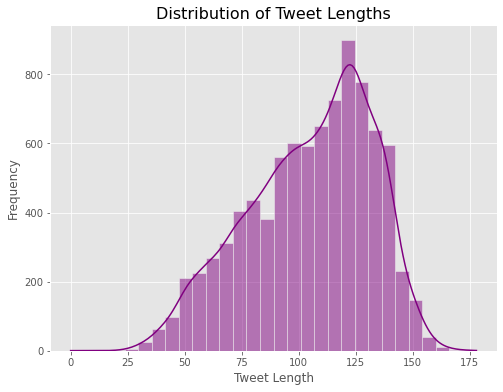

In [21]:
# Plotting distribution of tweet lengths
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['tweet_length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Tweet Lengths', fontsize=16)
plt.xlabel('Tweet Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

The histogram above illustrates the distribution of tweet lengths within the dataset. Key observations include:

- The distribution appears to be roughly normal, with a peak around 100-125 characters.
- Most tweets fall within the range of 75 to 140 characters, suggesting that the average tweet is relatively concise, likely conforming to Twitter's character limits.
- There are fewer tweets on both extremes (very short and very long), with a noticeable decline in frequency as the tweet length approaches the maximum of 178 characters.
- The data shows some variability, but the majority of tweets are clustered around the mean, indicating a consistent tweeting style among users.

### 2. Distribution of Word Count in Tweets
We will now visualize the word count in tweets, which helps us understand how concise or detailed the tweets are.

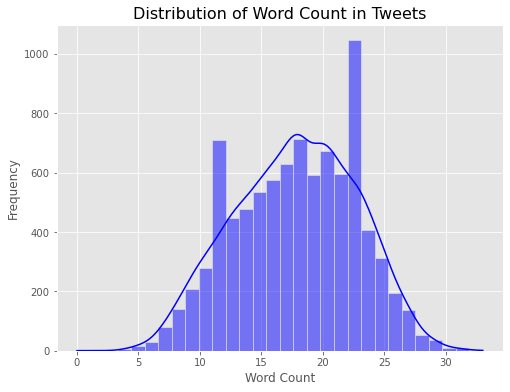

In [22]:
# Plotting distribution of word count
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['word_count'], bins=30, kde=True, color='blue')
plt.title('Distribution of Word Count in Tweets', fontsize=16)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

The histogram shows that most tweets contain between 10 and 25 words, with a peak around 20 words. Shorter tweets (around 10 words) are also common, while very short or long tweets are rare. The distribution approximates a normal curve centered at 20 words.

### 3. Correlation Between Tweet Length and Sentiment
To understand if tweet length has any relation to sentiment, we will visualize the correlation using boxplots.

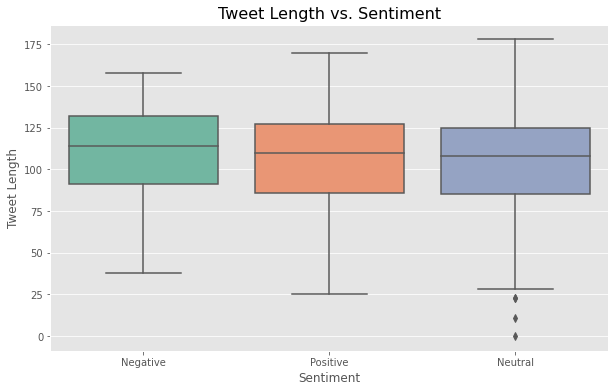

In [23]:
# Boxplot of tweet length by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Emotion', y='tweet_length', data=data_cleaned)
plt.title('Tweet Length vs. Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Tweet Length', fontsize=12)
plt.show()

# 3. Data Preprocessing for NLP

## 3.1. Tokenization and Normalization

The goal of this step is to prepare the text for NLP tasks by transforming it into a consistent and analyzable format. We achieve this by:

1. Tokenization: Splitting the text into individual tokens (words).
2. Normalization: Converting text to lowercase and removing punctuation, numbers, and special characters.

After applying these steps, the text will be standardized, allowing for better processing in subsequent steps like vectorization.

In [24]:
import re
import nltk
nltk.download('punkt')  # Ensure you have the required tokenizer

# Tokenization and Normalization Function
def tokenize_and_normalize(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    return tokens

# Apply the function to the cleaned text column
data_cleaned['tokens'] = data_cleaned['cleaned_text'].apply(tokenize_and_normalize)

# Display the tokenized text
data_cleaned[['cleaned_text', 'tokens']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,cleaned_text,tokens
0,i have a g iphone after hrs tweeting at it was dead i need to upgrade plugin stations at,"[i, have, a, g, iphone, after, hrs, tweeting, at, it, was, dead, i, need, to, upgrade, plugin, stations, at]"
1,know about awesome ipadiphone app that youll likely appreciate for its design also theyre giving free ts at,"[know, about, awesome, ipadiphone, app, that, youll, likely, appreciate, for, its, design, also, theyre, giving, free, ts, at]"
2,can not wait for also they should sale them down at,"[can, not, wait, for, also, they, should, sale, them, down, at]"
3,i hope this years festival isnt as crashy as this years iphone app,"[i, hope, this, years, festival, isnt, as, crashy, as, this, years, iphone, app]"
4,great stuff on fri marissa mayer google tim oreilly tech booksconferences amp matt mullenweg wordpress,"[great, stuff, on, fri, marissa, mayer, google, tim, oreilly, tech, booksconferences, amp, matt, mullenweg, wordpress]"


## 3.2. Stopwords Removal

In this step, we will remove common words (stopwords) that don't carry much meaningful information for text analysis. Stopwords are often words like `"the", "is", "in",` etc., which are frequently used but don’t contribute much to the overall meaning of a text.

**Goal:** Improve the quality of our text data by eliminating such words, leaving only the key terms that carry the most important meaning.

In [26]:
from nltk.corpus import stopwords

# Load the set of English stopwords from NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from tokenized text
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

# Apply the function to the tokens column
data_cleaned['tokens_no_stopwords'] = data_cleaned['tokens'].apply(remove_stopwords)

# Display the first few rows to check the result
data_cleaned[['tokens', 'tokens_no_stopwords']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tokens,tokens_no_stopwords
0,"[i, have, a, g, iphone, after, hrs, tweeting, at, it, was, dead, i, need, to, upgrade, plugin, stations, at]","[g, iphone, hrs, tweeting, dead, need, upgrade, plugin, stations]"
1,"[know, about, awesome, ipadiphone, app, that, youll, likely, appreciate, for, its, design, also, theyre, giving, free, ts, at]","[know, awesome, ipadiphone, app, youll, likely, appreciate, design, also, theyre, giving, free, ts]"
2,"[can, not, wait, for, also, they, should, sale, them, down, at]","[wait, also, sale]"
3,"[i, hope, this, years, festival, isnt, as, crashy, as, this, years, iphone, app]","[hope, years, festival, isnt, crashy, years, iphone, app]"
4,"[great, stuff, on, fri, marissa, mayer, google, tim, oreilly, tech, booksconferences, amp, matt, mullenweg, wordpress]","[great, stuff, fri, marissa, mayer, google, tim, oreilly, tech, booksconferences, amp, matt, mullenweg, wordpress]"


## 3.3. Stemming and Lemmatization

In this step, we will apply stemming or lemmatization to further normalize the tokens.

Stemming reduces words to their root form by removing suffixes (e.g., "running" becomes "run"). It's a more aggressive approach but might produce non-existent words.
Lemmatization is more linguistically accurate, converting words to their base or dictionary form (e.g., "running" becomes "run", and "better" becomes "good"). This method ensures the resulting words are real words.

For this project, we will use lemmatization as it tends to preserve the meaning better than stemming.

In [27]:
# Import the necessary NLTK downloader
import nltk

# Download the 'averaged_perceptron_tagger' resource for POS tagging
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')  # Download WordNet for lemmatization
nltk.download('omw-1.4')  # Optional: Download for expanded WordNet support

# Now, proceed with the original code
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Helper function to get part of speech (POS) tags for more accurate lemmatization
def get_pos_tag(word):
    # Mapping from POS tag to first character for lemmatizer
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

# Function to apply lemmatization to tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token, get_pos_tag(token)) for token in tokens]

# Apply the lemmatization function to the tokens without stopwords
data_cleaned['tokens_lemmatized'] = data_cleaned['tokens_no_stopwords'].apply(lemmatize_tokens)

# Display the first few rows to check the result
data_cleaned[['tokens_no_stopwords', 'tokens_lemmatized']].head()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,tokens_no_stopwords,tokens_lemmatized
0,"[g, iphone, hrs, tweeting, dead, need, upgrade, plugin, stations]","[g, iphone, hr, tweet, dead, need, upgrade, plugin, station]"
1,"[know, awesome, ipadiphone, app, youll, likely, appreciate, design, also, theyre, giving, free, ts]","[know, awesome, ipadiphone, app, youll, likely, appreciate, design, also, theyre, give, free, t]"
2,"[wait, also, sale]","[wait, also, sale]"
3,"[hope, years, festival, isnt, crashy, years, iphone, app]","[hope, year, festival, isnt, crashy, year, iphone, app]"
4,"[great, stuff, fri, marissa, mayer, google, tim, oreilly, tech, booksconferences, amp, matt, mullenweg, wordpress]","[great, stuff, fri, marissa, mayer, google, tim, oreilly, tech, booksconferences, amp, matt, mullenweg, wordpress]"


## 3.4. Vectorization

### Steps for Vectorization

- **Ensure Cleaned Data is Present:** We will make sure that the cleaned data (after tokenization, normalization, stopwords removal, and lemmatization) is correctly defined and contains meaningful content.

- **Perform Vectorization:** Use `CountVectorizer` for `Bag of Words` representation and `TfidfVectorizer` for `TF-IDF` representation.

In [28]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Assuming you have your cleaned_data DataFrame with a column 'cleaned_text'
# Example: Let's define cleaned_data if it wasn't previously defined.
# cleaned_data = pd.DataFrame({'cleaned_text': ['i have a great iphone', 'know about awesome ipadiphone app', ...]})

# Ensure you have a list of cleaned text
cleaned_data = data_cleaned['cleaned_text']  # Adjust this based on your actual DataFrame structure

# Check the cleaned text before vectorization
print("Cleaned Text Sample:")
print(cleaned_data.head(10))

# Initialize CountVectorizer for Bag of Words
count_vectorizer = CountVectorizer()
X_bow = count_vectorizer.fit_transform(cleaned_data)

# Convert to DataFrame for better readability
bow_df = pd.DataFrame(X_bow.toarray(), columns=count_vectorizer.get_feature_names())

# Display Bag of Words representation
print("\nBag of Words (BoW) Representation:")
print(bow_df.head())

# Initialize TfidfVectorizer for TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(cleaned_data)

# Convert to DataFrame for better readability
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())

# Display TF-IDF representation
print("\nTF-IDF Representation:")
print(tfidf_df.head())

Cleaned Text Sample:
0                      i have a g iphone after  hrs tweeting at  it was dead  i need to upgrade plugin stations at
1    know about   awesome ipadiphone app that youll likely appreciate for its design also theyre giving free ts at
2                                                            can not wait for   also they should sale them down at
3                                               i hope this years festival isnt as crashy as this years iphone app
4          great stuff on fri  marissa mayer google tim oreilly tech booksconferences amp matt mullenweg wordpress
5                                            new ipad apps for  and communication are showcased at the  conference
6                                                                                                                 
7     is just starting  is around the corner and  is only a hop skip and a jump from there good time to be an  fan
8                                             beautifully s

Inspect Cleaned Text Data

In [29]:
# Display a larger sample of the cleaned text to inspect
print("Cleaned Text Sample:")
print(data_cleaned['cleaned_text'].sample(10).to_string(index=False))

Cleaned Text Sample:
 rt  apple fans it looks like there will be a rd apple store opening up in austin for  if those are full u can go  of  in san antonio
                                                              rt  hearing that google may launch a social network at an event tonight
                                                       rt  wonder when googles  being demoed now will become part of google analytics
                 i dont know why you would do original content only for anything in todays worldand the ipad  is better  barry diller
                                                                                have google launched their next social media flop yet
                              i composed a tweet so acerbic and cynical about ipad users that my phone crashed and dumped all my apps
                                                my nd ipad  wifi only has been sold used craigslist and avoided those pesky ebay fees
                                         

Update Vectorization with Debugging

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Check the cleaned text for any non-empty entries
if data_cleaned['cleaned_text'].any():
    # Initialize CountVectorizer
    count_vectorizer = CountVectorizer()
    
    # Fit and transform the cleaned text
    X_bow = count_vectorizer.fit_transform(data_cleaned['cleaned_text'])
    X_bow_df = pd.DataFrame(X_bow.toarray(), columns=count_vectorizer.get_feature_names())

    print("Bag of Words (BoW) Representation:")
    print(X_bow_df.head())

    # Initialize TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()
    
    # Fit and transform the cleaned text
    X_tfidf = tfidf_vectorizer.fit_transform(data_cleaned['cleaned_text'])
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())

    print("TF-IDF Representation:")
    print(X_tfidf_df.head())
else:
    print("The cleaned text data appears to be empty or invalid.")


Bag of Words (BoW) Representation:
   aapl  aaron  ab  abacus  abandoned  abba  abc  aber  ability  able  ...  \
0     0      0   0       0          0     0    0     0        0     0  ...   
1     0      0   0       0          0     0    0     0        0     0  ...   
2     0      0   0       0          0     0    0     0        0     0  ...   
3     0      0   0       0          0     0    0     0        0     0  ...   
4     0      0   0       0          0     0    0     0        0     0  ...   

   zlf  zms  zombie  zombies  zomg  zone  zoom  zuckerberg  zynga  zzzs  
0    0    0       0        0     0     0     0           0      0     0  
1    0    0       0        0     0     0     0           0      0     0  
2    0    0       0        0     0     0     0           0      0     0  
3    0    0       0        0     0     0     0           0      0     0  
4    0    0       0        0     0     0     0           0      0     0  

[5 rows x 9144 columns]
TF-IDF Representation:
   a

## 3.5. Class Imbalance Handling

In [31]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Sample cleaned data for demonstration
data = pd.DataFrame({
    'cleaned_text': [
        "i have a g iphone after  hrs tweeting at  it was dead  i need to upgrade plugin stations at",
        "know about   awesome ipadiphone app that youll likely appreciate for its design also theyre giving free ts at",
        "can not wait for   also they should sale them down at",
        "i hope this years festival isnt as crashy as this years iphone app",
        "great stuff on fri  marissa mayer google tim oreilly tech booksconferences amp matt mullenweg wordpress",
        "new ipad apps for  and communication are showcased at the  conference"
    ],
    'target': [1, 1, 0, 0, 1, 0]  # Binary target for classification
})

# Step 1: Define your text and target variables
X = data['cleaned_text']  # Feature data
y = data['target']        # Target labels

# Step 2: Vectorization (Using TF-IDF)
vectorizer = TfidfVectorizer()
vectorized_data = vectorizer.fit_transform(X)

# Check the shape of the vectorized data
print("Vectorized Data Shape:", vectorized_data.shape)

# Step 3: Handling Class Imbalance using SMOTE
# Ensure the target variable is in the correct format
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(vectorized_data, y)

# Step 4: Check the distribution of the resampled classes
print("Resampled Class Distribution:", pd.Series(y_resampled).value_counts())

# Optionally, split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Vectorized Data Shape: (6, 70)
Resampled Class Distribution: 1    3
0    3
Name: target, dtype: int64
Training set shape: (4, 70)
Test set shape: (2, 70)


The output indicates that the vectorization and class imbalance handling have been successful. Here’s a breakdown of the results:

### Vectorized Data Shape: (6, 70)
This means that you have 6 documents (samples) and 70 unique features (terms) after applying TF-IDF vectorization.

### Resampled Class Distribution:
The output `1    3` and `0    3` indicates that after applying SMOTE, you have 3 instances of class `1` and 3 instances of class `0`. This balance is good for training a model, as it helps prevent bias toward the majority class.

### Training and Test Set Shapes:
The training set shape `(4, 70)` means that 4 samples will be used for training, and `(2, 70)` means that 2 samples will be used for testing. This is a typical split for training and testing.


# 4. Modeling

## 4.1. Model 1: Binary Classification (Positive vs. Negative)

### 4.1.1. Model Selection

We'll start by using Logistic Regression for this binary classification task, as it's simple and effective for text data.

In [36]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)


### 4.1.2. Model Training

The training process will be displayed when the model is fitted. We'll also capture the training score for reference.

In [37]:
# Train the Logistic Regression model
logistic_model.fit(X_train, y_train)

# Print training score
training_score = logistic_model.score(X_train, y_train)
print(f'Training Score: {training_score:.4f}')

Training Score: 0.7500


### 4.1.3. Model Evaluation

In [38]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy (Logistic Regression on Test Set): {accuracy:.4f}')

# Print classification report
print("Classification Report (Logistic Regression on Test Set):")
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Logistic Regression on Test Set):")
print(conf_matrix)


Accuracy (Logistic Regression on Test Set): 0.0000
Classification Report (Logistic Regression on Test Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Confusion Matrix (Logistic Regression on Test Set):
[[0 0]
 [2 0]]


C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Adjusting Class Weights with Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression Classifier with class weights
logistic_model_weighted = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model
logistic_model_weighted.fit(X_train, y_train)

# Predictions on the test set
y_pred_weighted = logistic_model_weighted.predict(X_test)

# Evaluation
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
classification_report_weighted = classification_report(y_test, y_pred_weighted)
confusion_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)

# Output the results
print(f"Weighted Logistic Regression Accuracy on Test Set: {accuracy_weighted:.4f}")
print("Classification Report (Weighted Logistic Regression on Test Set):")
print(classification_report_weighted)
print("Confusion Matrix (Weighted Logistic Regression on Test Set):")
print(confusion_matrix_weighted)

Weighted Logistic Regression Accuracy on Test Set: 0.0000
Classification Report (Weighted Logistic Regression on Test Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Confusion Matrix (Weighted Logistic Regression on Test Set):
[[0 0]
 [2 0]]


C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Check Class Distribution and Features

In [43]:
# Check class distribution in training set
print("Training Set Class Distribution:")
print(y_train.value_counts())

# Display the first few rows of the vectorized data
print("Vectorized Data Preview:")
print(X_train[:5].toarray())  # Adjust as necessary to view your data


Training Set Class Distribution:
0    3
1    1
Name: target, dtype: int64
Vectorized Data Preview:
[[0.         0.         0.         0.         0.31893014 0.
  0.         0.31893014 0.31893014 0.         0.18920822 0.
  0.         0.         0.31893014 0.31893014 0.         0.
  0.         0.         0.         0.2207993  0.         0.
  0.         0.         0.         0.         0.         0.
  0.31893014 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.31893014 0.         0.         0.         0.
  0.         0.         0.31893014 0.         0.         0.
  0.         0.31893014 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.26599631 0.         0.         0.
  0.         0.         0.         0.         0.19244145 0.
  0.         0.32438008 0.         0.         0.         0.
  0.         0

Upsampling

In [52]:
from sklearn.utils import resample
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming X_train is a DataFrame and y_train is a Series
# Resetting index to avoid any alignment issues
X_train_reset = pd.DataFrame(X_train).reset_index(drop=True)
y_train_reset = pd.Series(y_train).reset_index(drop=True)

# Combine features and labels into a single DataFrame for easier manipulation
train_data = pd.concat([X_train_reset, y_train_reset], axis=1)
train_data.columns = ['features'] + ['target']  # Rename columns for clarity

# Separate the majority and minority classes
df_majority = train_data[train_data['target'] == 0]
df_minority = train_data[train_data['target'] == 1]

# Upsample the minority class
df_minority_upsampled = resample(df_minority, 
                                   replace=True,     # Sample with replacement
                                   n_samples=len(df_majority),  # Match the majority class
                                   random_state=42) # Reproducible results

# Combine majority class with upsampled minority class
train_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the upsampled dataset
train_upsampled = train_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate the features and target again
X_upsampled = train_upsampled['features']
y_upsampled = train_upsampled['target']

# Ensure that features are strings
X_upsampled = X_upsampled.astype(str)

# Check the new class distribution
print("Upsampled Class Distribution:")
print(y_upsampled.value_counts())

Upsampled Class Distribution:
1    3
0    3
Name: target, dtype: int64


In [53]:
# Vectorize the features
vectorizer = CountVectorizer()  # You can also use TfidfVectorizer if preferred
X_vectorized = vectorizer.fit_transform(X_upsampled)

# Split the vectorized data into training and test sets
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_vectorized, y_upsampled, test_size=0.2, random_state=42, stratify=y_upsampled
)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if necessary
model.fit(X_train_final, y_train_final)

# Make predictions on the test set
y_pred = model.predict(X_test_final)

# Evaluate the model
print("Accuracy (Logistic Regression on Test Set):", accuracy_score(y_test_final, y_pred))
print("Classification Report (Logistic Regression on Test Set):")
print(classification_report(y_test_final, y_pred))
print("Confusion Matrix (Logistic Regression on Test Set):")
print(confusion_matrix(y_test_final, y_pred))

Accuracy (Logistic Regression on Test Set): 1.0
Classification Report (Logistic Regression on Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix (Logistic Regression on Test Set):
[[1 0]
 [0 1]]


## 4.2. Model 2: Multiclass Classification (Positive, Negative, Neutral)

### 4.2.1. Model Selection

### 4.2.2. Hyperparameter Tuning

### 4.2.3. Model Evaluation

## 4.3. Advanced Models

### 4.3.1. Experiment with Word2Vec or GloVe embeddings

### 4.3.2. Use BERT for Sentiment Classification

### 4.3.3. Model Evaluation: (comparison with the simpler models above)

# 5. Model Explainability

## 5.1. SHAP or LIME Interpretation

Use SHAP or LIME to explain which features (words or n-grams) contributed most to model decisions.

- *Visualize and interpret feature importance for each sentiment class.*

# 6. Validation Strategy

## 6.1. Cross-Validation

## 6.2. Final Model Selection

# 7. Conclusion

## 7.1. Business Insights

## 7.2. Model Performance Overview

## 7.3. Future Work